 <nav class="navbar navbar-default">
  <div class="container-fluid">
    <div class="navbar-header">
      <a class="navbar-brand" href="_Oving8.ipynb">Øving 8</a>
    </div>
    <ul class="nav navbar-nav">
    <li ><a href="Matplotlib.ipynb">Matplotlib</a></li>
    <li ><a href="Eksamen%202012.ipynb">Eksamen Python 2012</a></li>
    <li ><a href="Sudoku.ipynb">Sudoku</a></li>
    <li ><a href="numpy-arrays%20og%20matplotlib.ipynb">Numpy-arrays og matplotlib</a></li>
    <li class="active"><a href="Bokanalyse%20med%20plotting.ipynb">Bokanalyse med plotting</a></li>
    <li ><a href="Sjakk.ipynb">Sjakk</a></li>
    </ul>
  </div>
</nav>



# Numpy-arrays og matplotlib

**Læringsmål**

* Numpy-arrays
* Plotting



Numpy og matplotlib brukes ofte til statistikk og analyser, og i denne oppgaven skal vi laste inn et stort datasett og gjennomføre enkle analyser på det. Datasettet som er hentet [herfra](https://archive.ics.uci.edu/ml/datasets/Wine+Quality) inneholder 1599 rødviner og dets egenskaper og kvalitet. For å hente dataen kan du kjøre cellen under. vin-parameterne og vin-arrayet er lagret som globale variabler. Hver verdi i WINE_PARAMETERS tilsvarer en kolonne i WINES: Eksempelvis får du kvaliteten på alle vinene ved å kalle 
```python
quality_all_wines = WINES[:,11]
```
og all karakteristikk for den første vinen ved å kalle 
```python
quality_all_wines = WINES[0,:]
```

In [140]:
import numpy as np
import csv
%matplotlib inline


with open("csv-files/winequality-red.csv", 'r') as f:
    wines = list(csv.reader(f, delimiter=";"))

WINE_PARAMETERS = wines[0]
WINES = np.array(wines[1:], dtype=float)

print(f"Parametre: {WINE_PARAMETERS}")
print(f"Størrelse på WINES: {WINES.shape}")

Parametre: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
Størrelse på WINES: (1599, 12)


## a) Hent riktig data fra arrayet WINES

Lag en funksjon `get_wine_index(parameter)` som tar inn en av parameterne i WINE_PARAMETERS og returnerer indexen i WINE_PARAMETERS. Denne indexen tilsvarer også tilhørende kolonne i WINES. Hvis parameteren ikke eksisterer skal funksjonen printe ut "Fant ikke parameteren" og returnere None.

Denne funksjonen trenger vi for å hente ut riktig kolonne i WINES senere uten å måtte manuelt telle gjennom og finne riktig indeks.

`get_wine_index("quality")` skal returnere 11.


In [141]:
def get_wine_index(param : str):
    if param not in WINE_PARAMETERS:
        print(f"Could not find parameter: {param}")
        return None
    return WINE_PARAMETERS.index(param)

get_wine_index("quality")

11

## b) Koble data fra ulike kolonner sammen

I denne funksjonen skal du lage en funksjon `create_analysis_dict(noekkel_parameter, verdi_parameter)` som oppretter en dictionary der nøkkelen er alle unike verdier for parameter "noekkel_parameter", og verdien til nøkkelen er et numpy array med alle verdiene fra kolonnen "verdi_parameter" som har verdi tilsvarende nøkkelen i den førstnevnte kolonnen.

Eksempelvis, hvis vi valge "quality" som nøkkel-parameter, og "alcohol" som verdi-parameter, vil nøklene i dictionarien bestå av unike kvalitets-scorer (3, 4, 5, 6, 7, 8), og hvert element vil bestå av alle alkoholprosentene til vinene som har den scoren.

In [142]:
def create_analysis_dict(key_param, value_param):
    d = {}
    keys = WINES[:,get_wine_index(key_param)]
    values = WINES[:,get_wine_index(value_param)]
    for i in range(len(keys)):
        if keys[i] in d:
            d[keys[i]].append(values[i])
        else:
            d[keys[i]] = [values[i]]
    return d

test = create_analysis_dict("quality", "alcohol")

Hint: Bruk funksjonen fra oppgave a for å finne riktig kolonne-indeks for parameterne

## Oppgave c)

I denne oppgaven skal vi utføre enkel statistikk på dictionarien vi lagde i forrige oppgave. Dictionarien inneholder informasjon om to utvalge karakteristikker, og vi ønsker å finne ut minimum, maksimum og gjennomsnittlige verdier. Lag en function som tar inn en slik dictionary og returnerer fire numpy-array-elementer: nøkler, gjennomsnitt, maks-verdier og min-verdier. Alle disse arrayene skal ha samme størrelse



In [143]:
def get_stats_from_dict(d : dict):
    l = [] 
    for k in d.keys():
        l.append(d[k])
    
    mi, ma, avg = [], [], []
    for i in range(len(l)):
        mi.append(np.min(l[i]))
        ma.append(np.max(l[i]))
        avg.append(round(np.average(l[i]), 2))

    return np.array(list(d.keys())), np.array(mi), np.array(ma), np.array(avg)

k, mi, ma, avg = get_stats_from_dict(test)
print(k, mi, ma, avg)

[5. 6. 7. 4. 8. 3.] [8.5 8.4 9.2 9.  9.8 8.4] [14.9 14.  14.  13.1 14.  11. ] [ 9.9  10.63 11.47 10.27 12.09  9.96]


## Oppgave d)

Nå er det på tide å sette alt sammen! Bestem deg for to parametere du ønsker å se sammenhengen med! Bruk funksjonene fra tidligere oppgaver og plot sammenhengen mellom de på en fin måte! Her kan velge litt hvordan du ønsker å gjøre det, men det kan være smart å ha nøkler fra funksjonen i fra forrige oppgave langs x-aksen, og de andre verdiene langs y-aksen.

Et forslag til parametere å se på er "quality" og "alcohol".

(0.0, 20.0)

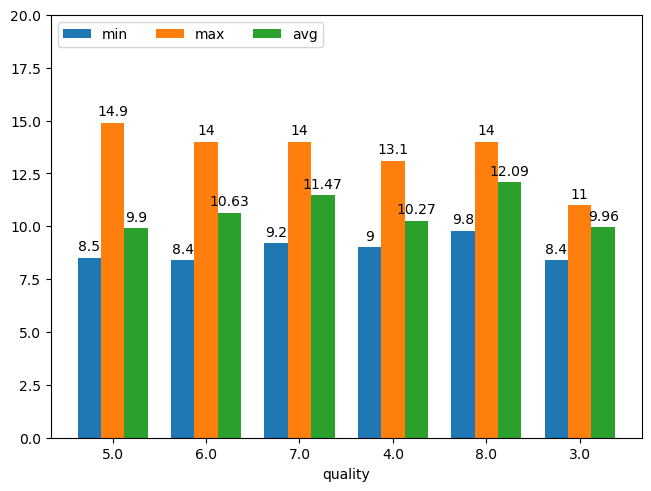

In [144]:
import matplotlib.pyplot as plt

y_elements = {
    'min': mi,
    'max': ma,
    'avg': avg,
}

x = np.arange(len(k))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in y_elements.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_xticks(x + width, k)
ax.set_xlabel("quality")
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 20)